**What is Logistic Regression?**

> Logistic Regression is a **statistical model** that uses a **logistic (sigmoid) function** to estimate the **probability of a binary outcome**.  

---

**What does Binary Outcome mean?**

A **binary outcome** means the **target variable** can take only **two possible values**, usually represented as `1` or `0`.

- Example: *Does a patient have a disease?*  
  - **Yes = 1**  
  - **No = 0**

We use `1` and `0` for simplicity in modeling:

- **1 → Event happens (positive class)**  
- **0 → Event does not happen (negative class)**


In [3]:
# Step 1: Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
df = pd.read_csv('heart_disease.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


**Step 2: Perform Sanity Checks on the Dataset**

Before building any model, we must **understand and inspect the dataset**.  
This step ensures that the data is clean, consistent, and ready for analysis.

**Common Sanity Checks:**
1. **Check the shape** of the dataset → how many rows and columns.  
2. **Look at the first few rows** to understand the structure.  
3. **Check column data types** (numerical, categorical, object).  
4. **Check for missing values**.  
5. **Get summary statistics** (mean, median, min, max, etc.).


In [5]:
# 1. Check shape attribute
df.shape  # Tells the dimensions of the data set

(319795, 18)

So we have 
 - 319,795 rows → these are the observations or records.
 - 18 columns → these are the features (variables) that describe each observation.

In [6]:
df.head(2) # Display first two rows

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No


**Target Variable vs Features**

- **HeartDisease** is our **target variable**  
  - Also called the **dependent variable** or **label**  
  - This is what we are trying to **predict**  
  - It’s a **binary outcome**:  
    - **Yes = 1**  
    - **No = 0**

---

- All the other columns are **features**  
  - Also called **independent variables** or **predictors**  
  - These are the inputs the model will use to make predictions  
  - Examples: `BMI`, `Smoking`, `Sex`, `AgeCategory`, etc.


In [7]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319793.000000,319795.00000,319795.000000,319795.000000
mean,28.325407,3.37171,3.898366,7.097075
std,6.356104,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319793 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319794 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [9]:
df.isna().sum()

HeartDisease        0
BMI                 2
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         1
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [10]:
df.duplicated().sum() #Check how many duplicate rows exist in the dataset.

np.int64(18078)

In [11]:
# Check Target variable distribution
df['HeartDisease'].value_counts()


HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

In [12]:
df['HeartDisease'].value_counts(normalize=True) # Check distribution in percentage

HeartDisease
No     0.914405
Yes    0.085595
Name: proportion, dtype: float64

**Class Imbalance in the Target Variable**

If we look at the distribution of the target variable:

- Around **91% = No (0)**
- Around **8.6% = Yes (1)**

This is a **huge imbalance** in the data.

Why is this important?  
- A Logistic Regression model trained on this data might become **biased towards predicting "No"**.  
- For example, if the model always predicts "No", it would already be **91% accurate**, but it would **completely fail to identify positive (Yes) cases**.  



Text(0.5, 0, 'Count')

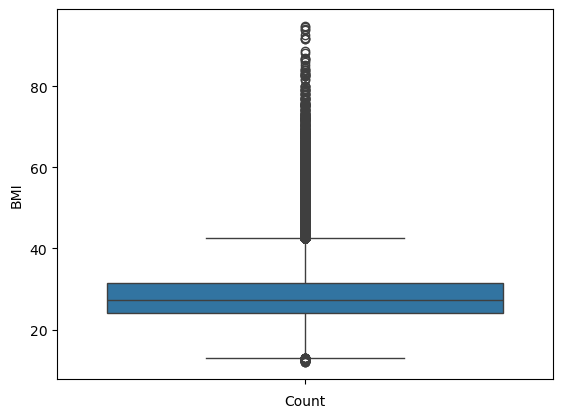

In [13]:
# Look for outliers in BMI

sns.boxplot(df['BMI'])
plt.xlabel("Count")


##### In the BMI column:
  - Most values lie between **18 and 40**.
  - Values above 40 are marked as **outliers**.
  - Maximum BMI in the dataset is around **95**.

Text(0.5, 0, 'Count')

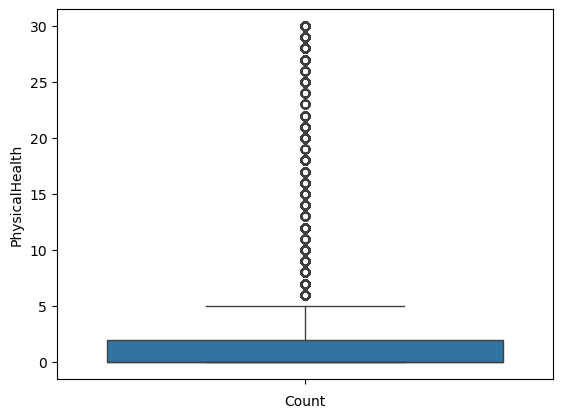

In [14]:
# Look for outliers in Physical

sns.boxplot(df['PhysicalHealth'])
plt.xlabel("Count")

#### Outliers in PhysicalHealth

- Boxplot shows that most people reported **0 days** of poor physical health.
- A small number reported values up to **30 days**.
- Statistically, these appear as outliers, but they are **valid values** because:
  - The feature is measured in days (range: 0–30).
  - Reporting 30 days of poor health is possible, not an error.

---
#### Understanding the Box in a Boxplot

- The **blue box** represents the **Interquartile Range (IQR)**, which contains the middle 50% of the data.
- It has **three key horizontal lines**:

1. **Bottom line of the box (Q1 / 25th percentile)**  
   - 25% of the data lies **below** this value.  

2. **Middle line of the box (Median / Q2 / 50th percentile)**  
   - The midpoint of the data.  
   - 50% of values lie **below** this line, 50% above.  

3. **Top line of the box (Q3 / 75th percentile)**  
   - 75% of the data lies **below** this value.  

---

### Whiskers
- Lines extending out of the box = **whiskers**.  
- They typically reach up to **1.5 × IQR** beyond Q1 and Q3.  
- Points beyond the whiskers are plotted as **outliers**.


---
## Data Cleaning

**First, we clean the dataset to remove noise.**

---
 **1. Handle Missing values**

  If any columns have missing data:
  
 - Option 1: Drop rows/columns with too many missing values.
     
 - Option 2: Impute (fill) them using mean/median for numeric or mode for categorical features.

In [15]:
# numeric and categorical
df_num = df.select_dtypes(include=['float','int']).columns.tolist()

df_cat = df.select_dtypes(include='object').columns.tolist()

print(f"Numerical columns: ",df_num)

print(f"Categorical columns: ",df_cat)

Numerical columns:  ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
Categorical columns:  ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']


In [16]:
# Drop the missing values 
df = df.dropna()

# Impute numeric columns with their mean
df[df_num] = df[df_num].fillna(df[df_num].mean())

# Impute categorical columns with their mode
for col in df_cat:
    df[col] = df[col].fillna(df[col].mode()[0])

**2. Handle Duplicated Rows**

In [17]:
print(f"Before Dropping duplicated rows:{df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Before Dropping duplicated rows:{df.duplicated().sum()}")

Before Dropping duplicated rows:18078
Before Dropping duplicated rows:0


---
**3. Handle outliers**

In [18]:
def detect_outliers(feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(outliers.shape[0])

def cap_outliers(feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[feature] = np.where(df[feature] < lower_bound, lower_bound,df[feature])
    df[feature] = np.where(df[feature] > upper_bound, upper_bound, df[feature])

    return df

In [19]:
print("Before Capping Outliers")
detect_outliers("BMI")

cap_outliers("BMI")

print("After Capping Outliers")
detect_outliers("BMI")

Before Capping Outliers
8905
After Capping Outliers
0


### Exploratory Data Analysis (EDA)

### 1. Univariate Analysis
- Goal: Understand **what each feature looks like** individually.  
- Tools:  
  - For **numeric features**: Histograms, KDE plots, Boxplots, Summary statistics.  
  - For **categorical features**: Count plots, Value counts, Bar plots.  

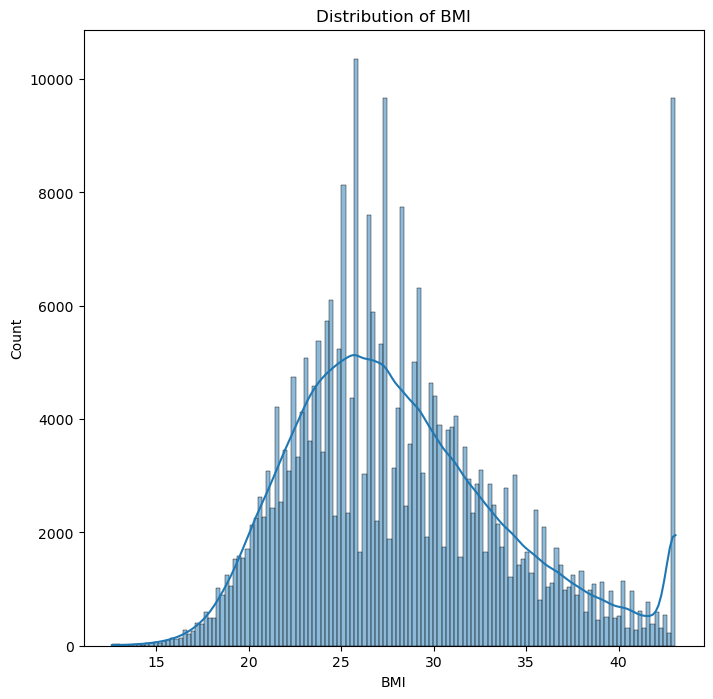

In [20]:
# Univariate Analysis of Numerical Features
plt.figure(figsize=(8,8))
sns.histplot(df["BMI"],kde=True )
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

### Distribution of BMI
- Most BMI values are centered around **25–27**.  
- The KDE curve shows a **right-skewed distribution** → some people have much higher BMI.  
- Outliers above **40** are present but still valid (extremely high BMI cases).


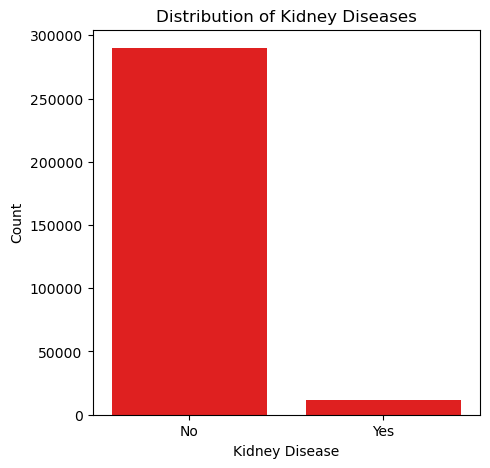

In [21]:
# Univariate Analysis for Categorical features

plt.figure(figsize=(5,5))
sns.countplot(x=df["KidneyDisease"],color='red')
plt.xlabel("Kidney Disease")
plt.ylabel("Count")
plt.title("Distribution of Kidney Diseases")
plt.show()

### Distribution of Kidney Diseases
- The dataset is highly **imbalanced**:
  - **No** → ~290,000 individuals  
  - **Yes** → ~10,000 individuals  
- Most people do **not** have kidney disease.  
- Important: This imbalance may affect model training, similar to what we saw with `HeartDisease`.


---
### 2. Bivariate Analysis
- **Goal**: Understand relationships between two variables (especially with the target `HeartDisease`).  

**1. Numeric vs Numeric**
- Tools: Scatter plots, Correlation heatmaps.  
- Example: Relationship between `BMI` and `SleepTime`.  

**2. Numeric vs Categorical**
- Tools: Boxplots, Violin plots.  
- Example: Compare `BMI` distribution across HeartDisease = Yes/No.  

**3. Categorical vs Categorical**
- Tools: Countplots with `hue`, Crosstabs, Grouped bar plots.  
- Example: Compare `Smoking` frequency across HeartDisease = Yes/No.


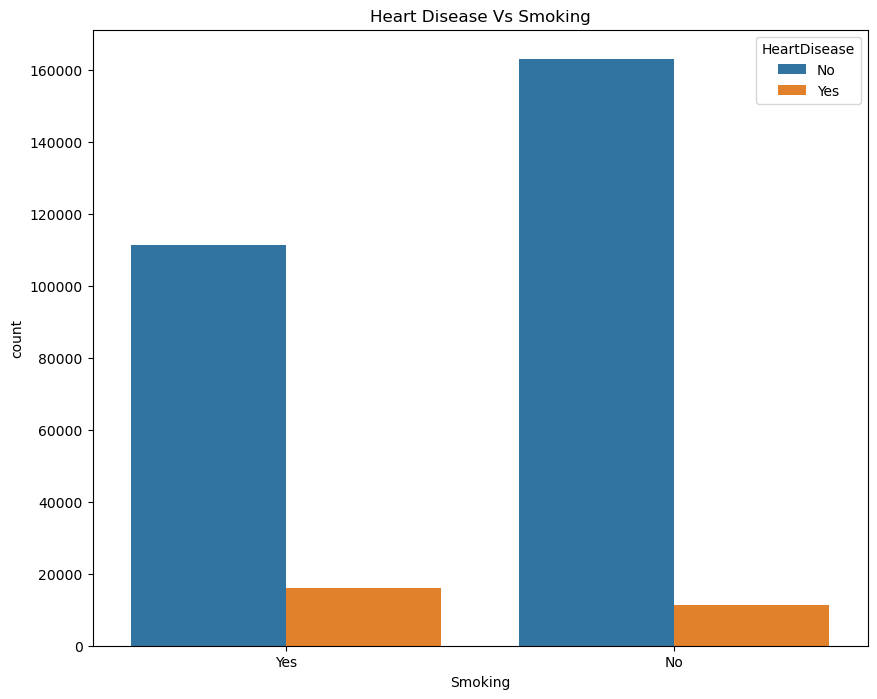

In [22]:
# Categorical vs Categorical plot
plt.figure(figsize=(10,8))
sns.countplot(x='Smoking', hue='HeartDisease', data=df)
plt.title("Heart Disease Vs Smoking")
plt.show()

### 3. Correlation Analysis
- Goal: Identify **multicollinearity** or strong relationships between numeric features.  
- Tools: Correlation matrix, Heatmap.  
- Example: Check correlation between `PhysicalHealth`, `MentalHealth`, and `SleepTime`.


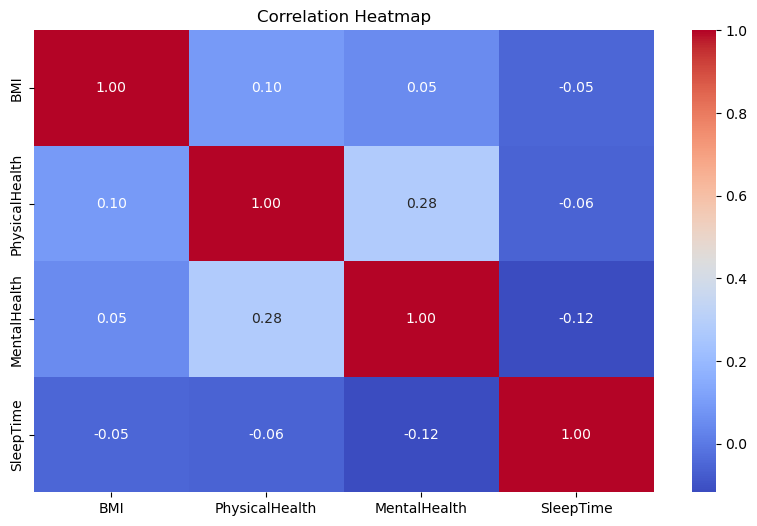

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df[df_num].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


### Correlation Heatmap (Numeric Features)

- Shows pairwise correlation between numeric variables.  
- Values range from **-1 to +1**:
  - **+1** → perfect positive correlation  
  - **-1** → perfect negative correlation  
  - **0** → no correlation  

Observations:
- `PhysicalHealth` and `MentalHealth` have a **moderate positive correlation (~0.28)** → people reporting poor physical health often also report poor mental health.  
- `BMI` has very weak correlation with other features.  
- `SleepTime` has weak negative correlation with `MentalHealth (-0.12)`.  


### 4. Class Balance
- Goal: Confirm **distribution of the target variable**.  
- Already checked → Highly imbalanced (91% No, 9% Yes).

<Axes: xlabel='HeartDisease', ylabel='count'>

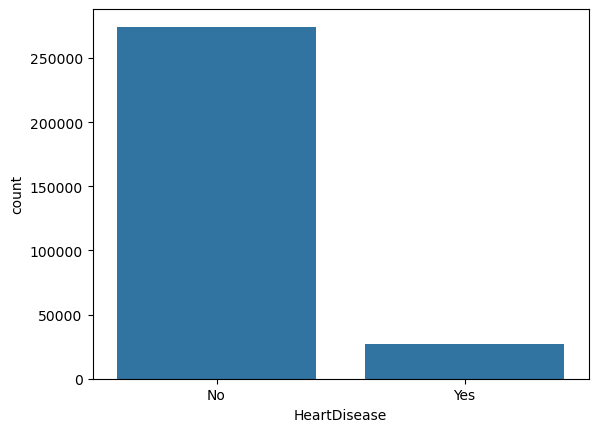

In [24]:
sns.countplot(x = df["HeartDisease"])

### Data Preprocessing

In [25]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [26]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = 'HeartDisease')
y = df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split( 
                                            X,y,
                                            random_state=42, 
                                            test_size=0.2 ,
                                            stratify=y
                                        )


**Why Split Before Scaling/Encoding?**

- To avoid **data leakage** → test set must remain unseen.  
- To mimic **real-world use** → we train only on training data, then apply the same transformations on unseen data.  
- To keep **consistency** → 
  - Training set: `fit_transform()`  
  - Test set: `transform()`  


In [27]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Ensure target is not in categorical feature list
if "HeartDisease" in df_cat:
    df_cat.remove("HeartDisease")

# Scale numeric columns
scaler = StandardScaler()
X_train[df_num] = scaler.fit_transform(X_train[df_num])
X_test[df_num] = scaler.transform(X_test[df_num])

# Encode categorical columns
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

X_train_encoded = pd.DataFrame(
    encoder.fit_transform(X_train[df_cat]),
    columns=encoder.get_feature_names_out(df_cat),
    index=X_train.index
)

X_test_encoded = pd.DataFrame(
    encoder.transform(X_test[df_cat]),
    columns=encoder.get_feature_names_out(df_cat),
    index=X_test.index
)

# Replace categorical with encoded features
X_train = X_train.drop(columns=df_cat).join(X_train_encoded)
X_test = X_test.drop(columns=df_cat).join(X_test_encoded)


**Scale Numeric Features**

   - Use `StandardScaler` → mean = 0, std = 1.
   - Prevents large-scale variables from dominating.
---

**Encode Categorical Features**

   - Use `OneHotEncoder`:
     - `drop='first'` → avoid dummy variable trap.
     - `sparse_output=False` → return dense DataFrame.
     - `handle_unknown='ignore'` → safe for unseen categories in test.
---
**Combine Features**
   - Drop original categorical columns.
   - Join encoded columns back to the dataset.
   - Now `X_train` and `X_test` are fully numeric → ready for Logistic Regression.

In [28]:
X_train.head(2)

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
162391,1.515668,-0.439689,-0.50722,-0.056580,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
103507,0.528528,1.031124,-0.13856,-0.737076,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [29]:
from sklearn.linear_model import LogisticRegression

# Initialize model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train model
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [30]:
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # probabilities for ROC-AUC

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Precision, Recall, F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Accuracy: 0.9115721790431367
Confusion Matrix:
 [[54435   456]
 [ 4880   572]]
Classification Report:
               precision    recall  f1-score   support

          No       0.92      0.99      0.95     54891
         Yes       0.56      0.10      0.18      5452

    accuracy                           0.91     60343
   macro avg       0.74      0.55      0.56     60343
weighted avg       0.89      0.91      0.88     60343

ROC-AUC Score: 0.8322956301592191


**Key Insight**
- High overall accuracy (91%) is misleading due to **class imbalance**.  
- Model performs well at predicting **No**, but poorly at predicting **Yes** (low recall = 10%).  
- ROC-AUC (0.83) shows the model has good discriminatory ability, but threshold tuning or resampling is needed to improve minority class detection.

In [32]:

# Initialize model
log_reg = LogisticRegression(max_iter=1000, random_state=42 , class_weight='balanced')

# Train model
log_reg.fit(X_train, y_train)

                             

# Predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # probabilities for ROC-AUC

# Precision, Recall, F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

          No       0.97      0.74      0.84     54891
         Yes       0.23      0.78      0.35      5452

    accuracy                           0.74     60343
   macro avg       0.60      0.76      0.60     60343
weighted avg       0.90      0.74      0.80     60343



#### Updated Model Performance (Logistic Regression with Class Weight/Resampling)

- **Accuracy**: 74%  
- **Classification Report**:
  - Class **No** → Precision = 0.97, Recall = 0.74, F1 = 0.84  
  - Class **Yes** → Precision = 0.23, Recall = 0.78, F1 = 0.35  

### Key Insights
- Accuracy dropped (from 91% → 74%) because the model is now focusing more on the minority class.  
- **Recall for Yes improved significantly (10% → 78%)** → model is catching many more positive cases.  
- Precision for Yes is lower (23%) → more false positives, but this trade-off is often acceptable in health-related predictions.  
- **Balanced performance**: The model is no longer biased toward predicting "No".


---
**Recall (Sensitivity / True Positive Rate)**
- Definition: Out of all the **actual positive cases**, how many did the model correctly identify as positive?  

**Precision (Positive Predictive Value)**
- Definition: Out of all the cases the model **predicted as positive**, how many were actually positive?  


**F1 is the **harmonic mean** of Precision and Recall.**

- Why harmonic mean?
  - It punishes extreme imbalance between Precision and Recall.
  - Ensures a model must do well on **both** to get a good F1.
- Useful for imbalanced datasets where Accuracy is misleading.